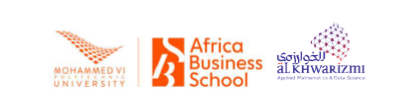

<h1 style='text-align: center;'>Numerical Linear Algebra & Parallel Computing</h1> 

<h2 style='text-align: center;'>  Sparce Matrices </h2>

####  Supervisors : Nouredine OUHADDOU - Mohamed Jalal Maaouni - Ibrahim EL MOUNTASSER

#### Author : Oumaima CHQAF

***

We will use the cell below for our imports.

Let's implement the function mat_mul_coo that takes two sparse matrices in coo and returns their product.

In [3]:
def mat_mul_coo(A, B):
    # Let's verify if the matrices are in COO format
    A = A.tocoo()
    B = B.tocoo()
    
    # We will check if the dimensions are compatible for matrix multiplication
    if A.shape[1] != B.shape[0]:
        raise ValueError("Matrices are not compatible for multiplication")
    
    # C is an empty COO matrix where we will store the result
    C = coo_matrix((A.shape[0], B.shape[1]))
    
    # We will fill in C
    for (i, j, a) in zip(A.row, A.col, A.data):
        for (k, l, b) in zip(B.row, B.col, B.data):
            if j == k:
                C[i, l] += a * b
    
    return C

Let's implement the function mat_mul_csr that takes two sparse matrices in csr format and returns their product.

In [ ]:
def mat_mul_csr(A, B):
    
    # Unpacking the CSR format
    data_A, indices_A, indptr_A = A
    data_B, indices_B, indptr_B = B

    # Checking the dimensions of the matrices
    assert indptr_A[-1] == indices_B.max() + 1

    # Computing the product in CSR format
    data_C = []
    indices_C = []
    indptr_C = [0]

    for i in range(len(indptr_A) - 1):
        row_start_A, row_end_A = indptr_A[i], indptr_A[i+1]
        row_C = {}
        for j in range(row_start_A, row_end_A):
            col_A = indices_A[j]
            for k in range(indptr_B[col_A], indptr_B[col_A+1]):
                col_B = indices_B[k]
                if col_B in row_C:
                    row_C[col_B] += data_A[j] * data_B[k]
                else:
                    row_C[col_B] = data_A[j] * data_B[k]
        data_C.extend(row_C.values())
        indices_C.extend(row_C.keys())
        indptr_C.append(len(indices_C))

    # Pack the CSR format of the product matrix
    C = (np.array(data_C), np.array(indices_C), np.array(indptr_C))
    return C


implement a function solve_lin_sys that takes a matrix A in csr format and a vector b as a numpy array and solves the system Ax = b.

In [4]:
def solve_lin_sys(A, b):
   #In case A wasn't csr format
    if not isinstance(A, csr_matrix):
        A = csr_matrix(A)
    
    # solve the system Ax = b
    x = spsolve(A, b)
    
    return x